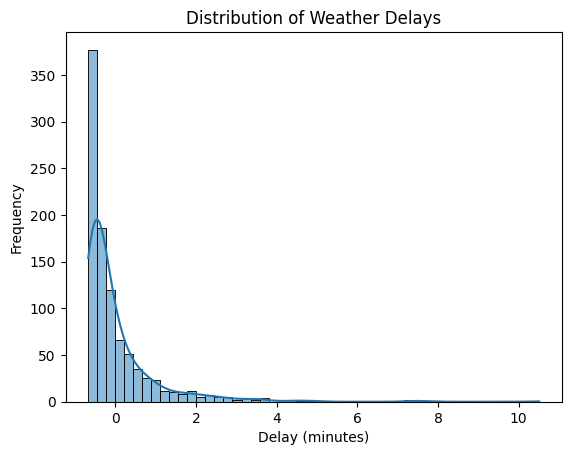

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Reading data
data = pd.read_csv("tnst_matched.csv")

# Building distribution & scoring delays
mu = np.mean(data["weather_delay"])
sigma = np.std(data["weather_delay"])
data["weather_z_score"] = (data["weather_delay"] - mu) / sigma

# Visualizing distribution
sns.histplot(data["weather_z_score"], kde=True, bins=50)
plt.title("Distribution of Weather Delays")
plt.xlabel("Delay (minutes)")
plt.ylabel("Frequency")
plt.show()

Mean Squared Error (MSE): 1.3839260390609134
Mean Absolute Error (MAE): 0.6985636538280642
R2 Score: -0.5635479706752033


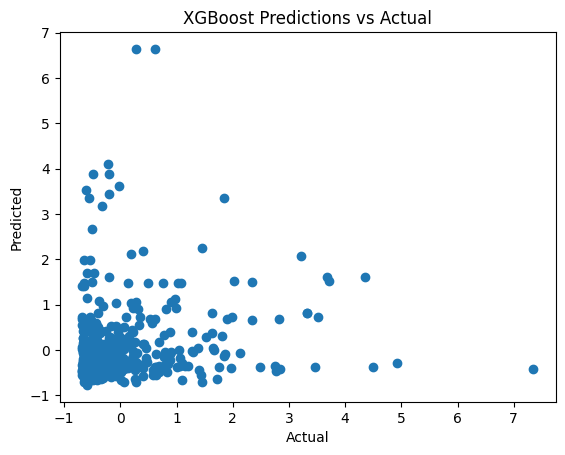

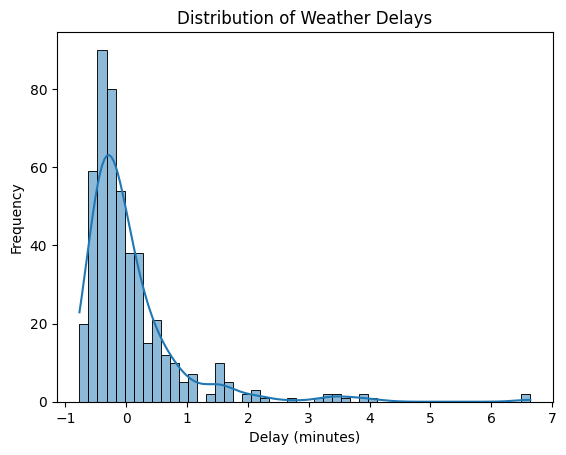

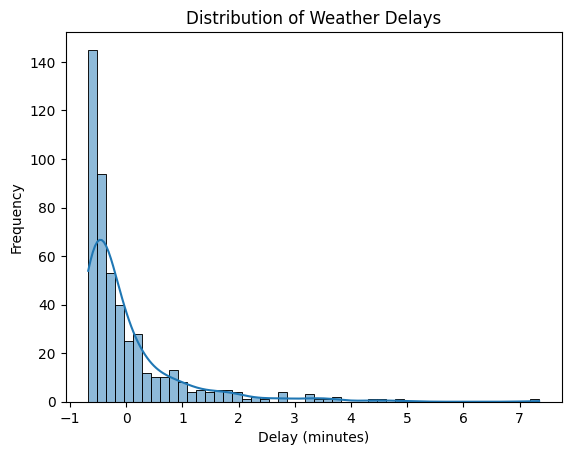

In [64]:
# Creating features and targets
X = data[["wind_speed", "wind_gust", "ceiling", "visibility", "temp", "dew_pnt", "pressure"]]
y = data["weather_z_score"]

# Splitting into into train test batches
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=50)

# Bulding XGBoost Model
model = XGBRegressor(
    n_estimators=100,
    max_depth=8,
    learning_rate=0.2
)

# Training and testing model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Printing results
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R2 Score: {r2}")

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("XGBoost Predictions vs Actual")
plt.show()

# Visualizing distribution
sns.histplot(y_pred, kde=True, bins=50)
plt.title("Distribution of Weather Delays")
plt.xlabel("Delay (minutes)")
plt.ylabel("Frequency")
plt.show()

# Visualizing distribution
sns.histplot(y_test, kde=True, bins=50)
plt.title("Distribution of Weather Delays")
plt.xlabel("Delay (minutes)")
plt.ylabel("Frequency")
plt.show()